In [2]:
from __future__ import print_function
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

colors = np.array([[175, 33, 8],
                   [20, 145, 4],
                   [177, 11, 237],
                   [14, 187, 235],
                   [3, 102, 163],
                   [0,0,0]
                  ])
class_dict = {0: 'G3', 1: 'G4', 2: 'G5', 3: 'BN', 4: 'ST'}

In [42]:
xl = sorted(glob.glob('../data/train_mask_ext/*png'))
xbase = [os.path.basename(x).replace('.png', '') for x in xl]
print(len(xbase))

il = sorted(glob.glob('../data/train_jpg_ext/*jpg'))
ibase = [os.path.basename(x).replace('.jpg', '') for x in il]
print(len(il))

mismatch = [x for x in xbase if x not in ibase]
mismatch2 = [x for x in ibase if x not in xbase]

print('Mismatch')
print(len(mismatch))
print('Mismatch2')
print(len(mismatch2))

2971
2971
Mismatch
0
Mismatch2
0


In [37]:
print(mismatch2)

[]


In [58]:
mask_list = sorted(glob.glob('../data/val_mask/*.png'))
mask_list_ = [x for x in mask_list if 'test' not in x]
mask_list_d = [x for x in mask_list if 'durham' in x]
img_list = sorted(glob.glob('../data/val_jpg/*.jpg'))
img_list_ = [x for x in img_list if 'test' not in x]
img_list_d = [x for x in img_list if 'durham' in x]
print(len(mask_list), len(img_list))
print(len(mask_list_), len(img_list_))
print(len(mask_list_d), len(img_list_d))

125 125
86 86
0 0


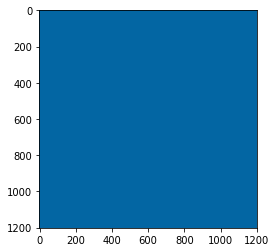

In [59]:
for mask_path, img_path in zip(mask_list_, img_list_):
    mask = cv2.imread(mask_path, -1)
    img = cv2.imread(img_path)
    img_out = np.dstack([np.zeros_like(mask)]*3)
    
#     mask2 = np.copy(mask)
#     mask[mask2 == 2] = 3
#     mask[mask2 == 3] = 4
    
    for k in range(5):
        img_out[mask == k, 0] = colors[k, 0]
        img_out[mask == k, 1] = colors[k, 1]
        img_out[mask == k, 2] = colors[k, 2]

    plt.imshow(img_out)

    tag_str = ''
    for k in np.unique(mask):
        tag_str += '_{}'.format(class_dict[k])

    basepath = os.path.basename(mask_path).replace('.png', '{}.jpg'.format(tag_str))
    outpath = os.path.join('../data/tmp/{}'.format(basepath))

    maskbase = os.path.basename(mask_path)        
    imgbase = os.path.basename(img_path)        
    
#     maskpth = os.path.join('../data/val_mask_ext', maskbase)
#     imgpth = os.path.join('../data/val_jpg_ext', imgbase)
#     print(maskpth, imgpth)
#     cv2.imwrite(maskpth, mask)
#     cv2.imwrite(imgpth, img)
    
    img_out = np.hstack([img_out[:,:,::-1], img])
    cv2.imwrite(outpath, img_out)
    
#     cv2.imwrite(mask_path, mask)